<a href="https://colab.research.google.com/github/JuanMartinez04/Sa-alesySistemas/blob/main/RC_THD_punto2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Calculo del THD a partir de la FFT
A continuación, se describen los pasos para calcular el THD:

Tome una señal de voltaje o corriente de CA y adquiera los datos de la señal. Idealmente, la señal debe ser sinusoidal y tener una duración suficientemente larga para una buena resolución en la FFT.

Calcule la FFT de la señal utilizando un algoritmo FFT.

Determine las magnitudes de los armónicos de la señal. Los armónicos se encuentran en múltiplos enteros de la frecuencia fundamental. Por ejemplo, si la frecuencia fundamental es de 60 Hz, entonces los armónicos estarán en 120 Hz, 180 Hz, 240 Hz y así sucesivamente.

Calcule la suma de las magnitudes cuadráticas de los armónicos (excluyendo el fundamental) y divídala por la magnitud cuadrática de la señal fundamental.

Calcule la raíz cuadrada del resultado de la etapa 4 para obtener el THD en porcentaje.

La fórmula para el cálculo del THD desde la FFT es:

THD = sqrt((H2^2 + H3^2 + ... + Hn^2) / H1^2) x 100%

Donde:

H1 es la magnitud de la señal fundamental.
H2, H3, ..., Hn son las magnitudes de los armónicos.
sqrt es la función de raíz cuadrada.
El THD se expresa en porcentaje.
Es importante tener en cuenta que la FFT es un método para analizar la distorsión armónica en señales periódicas. Si la señal no es periódica, entonces la FFT no será útil para calcular el THD. Además, el THD calculado a partir de la FFT puede no coincidir con el THD medido en el mundo real debido a las limitaciones de la FFT y a otros factores, como la precisión de la medición y la variación de la señal en el tiempo.

## Calcular la distorción del factor de potencia a partir del THD

Para calcular la distorsión del factor de potencia con base al THD, se necesita conocer la forma de onda de la corriente y la tensión del circuito. A partir de estas señales, se pueden calcular el factor de potencia y el THD, y luego utilizar estos valores para calcular la distorsión del factor de potencia.

El primer paso es calcular el factor de potencia, que se define como la relación entre la potencia real y la potencia aparente. Se puede calcular como:

cos(φ) = P / (V x I)

donde φ es el ángulo de fase entre la tensión y la corriente, P es la potencia real, V es la tensión y I es la corriente.

A continuación, se calcula el THD de la corriente y la tensión utilizando la Transformada Rápida de Fourier (FFT) sobre las formas de onda de la corriente y la tensión. El THD de la corriente y la tensión se pueden calcular como:

THD = sqrt((THD1^2 + THD2^2 + ... + THDn^2) / (fundamental^2)) x 100%

donde THD1, THD2, ..., THDn son las amplitudes de los armónicos de orden 2, 3, ..., n, y fundamental es la amplitud de la señal fundamental.

Una vez que se han calculado el factor de potencia y el THD, se puede calcular la distorsión del factor de potencia utilizando la siguiente fórmula:

Distorsión del factor de potencia = sqrt((cos^2(φ) + THD^2) - 1) x 100%

donde φ es el ángulo de fase calculado anteriormente y THD es el THD de la corriente o la tensión, dependiendo de si se desea calcular la distorsión del factor de potencia de la corriente o la tensión.


Además, la medida de distorsión del factor de potencia se puede calcular desde el THD, como:

$$PF_{THD}=\sqrt{\frac{1}{1+(THD)^2}}$$

In [45]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym 
#sym.init_session() 

# Funcion de transferencia

In [46]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R*C*s + 1) * X
Y

X(s)/(C*R*s + 1)

# Fijar valores de parámetros para simulación circuito RC


In [47]:
R1 = 10000 #valores de simulacion de R
C_a = 10e-6 # valores de simulacion de C
Y_RC = Y.subs(R, R1).subs(C, C_a)
Y_RC

X(s)/(0.1*s + 1)

#Función de transferencia 

In [48]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R1*C_a,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[0.1 1. ]


# Evaluar el sistema ante entrada de interés y obtener salida en arreglo numpy

In [49]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada 
#Para rectificador de media onda: 
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)
in_ = in_o * rec_c #si se quiere probar con rec media onda multiplicar por rec_m
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

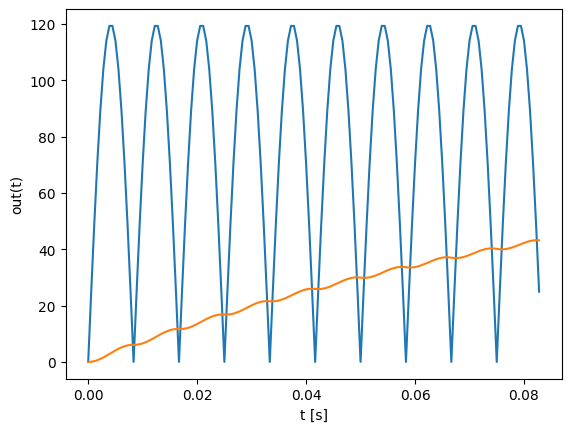

In [50]:
# imagen señal de entrada y salida
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

#Cálculo del espectro de la señal de salida con fft



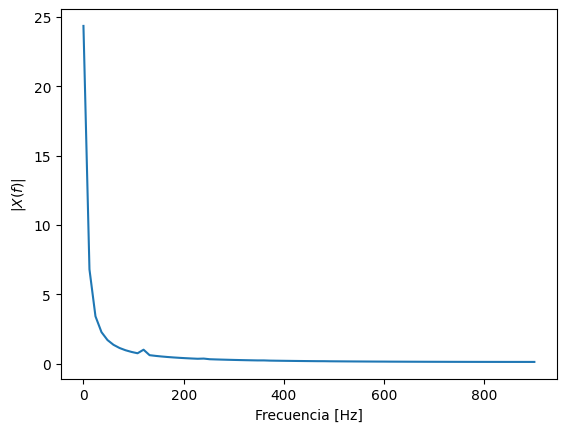

In [51]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)
plt.plot(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

# Cálculo de la distorsión total de armónicos - THD

Esta se hace a partir de tomar los n armonicos para calcular el factor de distorción, en este caso 14 armonicos diferentes al fundamental basado en la evaluación de la fft


In [55]:
thdn=0
for i in range(1,6):
  indice = np.where(vfre==(i+1)*Fo)
  magnitud = np.abs(Xf[indice])
  thdn= thdn + np.square(magnitud)
indice1 = np.where(vfre==Fo)
thd= np.sqrt(thdn)/np.square(np.abs(Xf[indice1]) )
print('El thd es',(np.real(thd)*100),'%')


El thd es [0.43979388] %


In [56]:
#Distorcion del factor de potencia:

PF_thd= np.sqrt(1/1+np.square(thd))

print('La distorción del factor de potencia es', PF_thd)


La distorción del factor de potencia es [1.00000967]
